In [1]:
# Logistic Regression

# Aim to identify players who would play less than 5 years in the NBA   (TARGET==0)

In [2]:
import sys
sys.path.append('../')

from src.visualization.model_evaluation import plot_confusion_matrix, plot_roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [3]:
# Import libraries for logistic regression

from sklearn.linear_model import LogisticRegression

In [4]:
# importing the dataset 

data = pd.read_csv('..\\data\\processed\\nba_train_processed.csv')

In [5]:


from sklearn.model_selection import train_test_split

X = data.drop(['TARGET_5Yrs'], axis = 1)

y = data['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)



In [6]:
# Perform Logistic Regression with cross validation

from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Train Data')

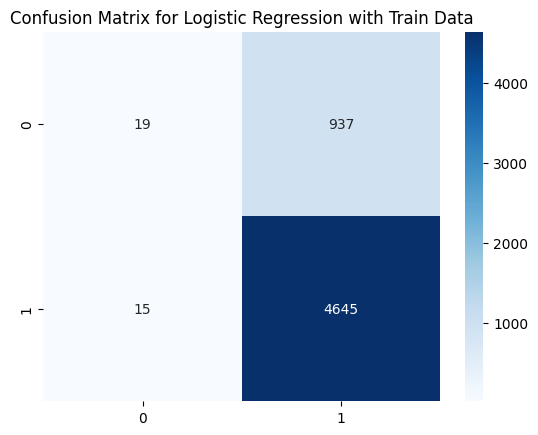

In [7]:
# Plot the confusion matrix with train data

plot_confusion_matrix(y_train, logreg.predict(X_train), title = "Confusion Matrix for Logistic Regression with Train Data")

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Test Data')

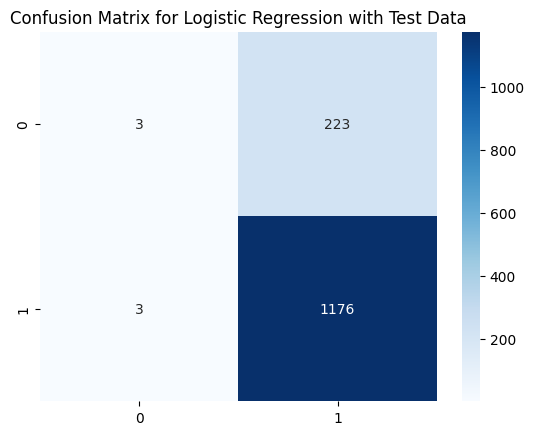

In [8]:
# Plot the confusion matrix with test data

plot_confusion_matrix(y_test, y_pred, title = "Confusion Matrix for Logistic Regression with Test Data")



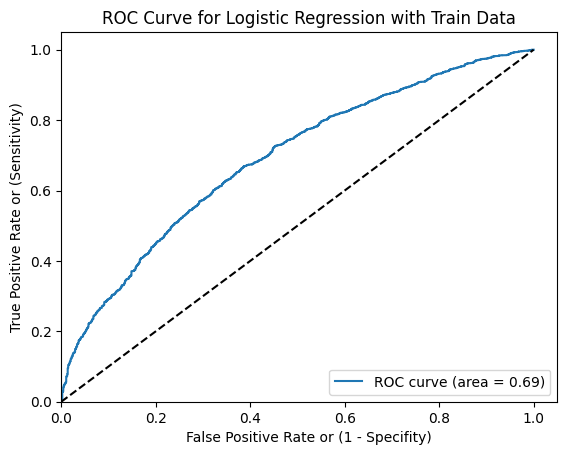

In [10]:
# Plot the ROC Curve for train data

plot_roc_curve(y_train, logreg.predict_proba(X_train)[:,1], "Logistic Regression with Train Data")

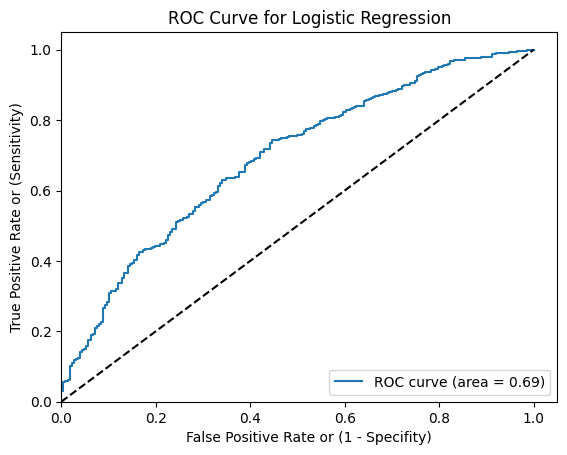

In [9]:
# Plot the ROC curve

plot_roc_curve(y_test, y_pred_prob, model_name="Logistic Regression")